In [2]:
! pip install matplotlib

In [3]:
! pip install pandas

In [4]:
! pip install seaborn

In [57]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('dataset_clientes.csv')

print(df.head())

  cliente_id  edad   ingresos     saldo  productos_contratados tipo_cuenta  \
0      C0001    56  500000.00  21244.70                      3   Corriente   
1      C0002    69   66064.78 -10000.00                      4   Inversión   
2      C0003   150   51446.25  20846.04                      2      Ahorro   
3      C0004    32   56286.53  19366.58                      3      Ahorro   
4      C0005    60   35704.58  16028.25                      2      Ahorro   

   churn  
0      0  
1      0  
2      0  
3      0  
4      1  


# Revisión general


In [6]:
df

,cliente_id,edad,ingresos,saldo,productos_contratados,tipo_cuenta,churn
0,C0001,56,500000.00,21244.70,3,Corriente,0
1,C0002,69,66064.78,-10000.00,4,Inversión,0
2,C0003,150,51446.25,20846.04,2,Ahorro,0
3,C0004,32,56286.53,19366.58,3,Ahorro,0
4,C0005,60,35704.58,16028.25,2,Ahorro,1
...,...,...,...,...,...,...,...
95,C0096,57,59082.25,17190.11,4,Corriente,0
96,C0097,38,39195.53,23318.85,4,Corriente,0
97,C0098,33,45950.99,11303.82,3,Inversión,1
98,C0099,62,47848.07,14464.03,4,Corriente,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cliente_id             100 non-null    object 
 1   edad                   100 non-null    int64  
 2   ingresos               95 non-null     float64
 3   saldo                  100 non-null    float64
 4   productos_contratados  100 non-null    int64  
 5   tipo_cuenta            97 non-null     object 
 6   churn                  100 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [8]:
df.describe

<bound method NDFrame.describe of    cliente_id  edad   ingresos     saldo  productos_contratados tipo_cuenta  \
0       C0001    56  500000.00  21244.70                      3   Corriente   
1       C0002    69   66064.78 -10000.00                      4   Inversión   
2       C0003   150   51446.25  20846.04                      2      Ahorro   
3       C0004    32   56286.53  19366.58                      3      Ahorro   
4       C0005    60   35704.58  16028.25                      2      Ahorro   
..        ...   ...        ...       ...                    ...         ...   
95      C0096    57   59082.25  17190.11                      4   Corriente   
96      C0097    38   39195.53  23318.85                      4   Corriente   
97      C0098    33   45950.99  11303.82                      3   Inversión   
98      C0099    62   47848.07  14464.03                      4   Corriente   
99      C0100    35   59255.06  12568.91                      4   Inversión   

    churn  
0    

In [9]:
df.columns

Index(['cliente_id', 'edad', 'ingresos', 'saldo', 'productos_contratados',
       'tipo_cuenta', 'churn'],
      dtype='object')

# Visualización de nulos y outliers

In [10]:
df.isna().sum()

cliente_id               0
edad                     0
ingresos                 5
saldo                    0
productos_contratados    0
tipo_cuenta              3
churn                    0
dtype: int64

In [11]:
df['tipo_cuenta'] = df['tipo_cuenta'].fillna('Desconocido')

df
    

,cliente_id,edad,ingresos,saldo,productos_contratados,tipo_cuenta,churn
0,C0001,56,500000.00,21244.70,3,Corriente,0
1,C0002,69,66064.78,-10000.00,4,Inversión,0
2,C0003,150,51446.25,20846.04,2,Ahorro,0
3,C0004,32,56286.53,19366.58,3,Ahorro,0
4,C0005,60,35704.58,16028.25,2,Ahorro,1
...,...,...,...,...,...,...,...
95,C0096,57,59082.25,17190.11,4,Corriente,0
96,C0097,38,39195.53,23318.85,4,Corriente,0
97,C0098,33,45950.99,11303.82,3,Inversión,1
98,C0099,62,47848.07,14464.03,4,Corriente,0


In [12]:
df['ingresos'] = df['ingresos'].fillna(0)

## visualización de outliers

In [13]:
df[['edad','saldo','edad']].describe()

,edad,saldo,edad
count,100.000000,100.000000,100.000000
mean,46.230000,14601.453400,46.230000
std,19.529235,5674.431954,19.529235
min,19.000000,-10000.000000,19.000000
25%,31.750000,11321.400000,31.750000
50%,43.000000,14847.720000,43.000000
75%,61.000000,18068.960000,61.000000
max,150.000000,30305.480000,150.000000


Text(0.5, 1.0, 'outliers en saldo')

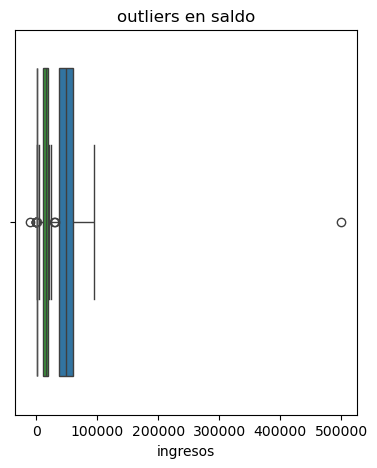

In [14]:
#visualización de los datos en gráficos

plt.figure(figsize = (15,5))

#grafico de ingresos

plt.subplot(1,3,1)
sns.boxplot(x=df['ingresos'])
plt.title('outliers en ingresos')

#grafico edad

plt.subplot(1,3,1)
sns.boxplot(x=df['edad'])
plt.title('outliers en edad')


#grafico saldo

plt.subplot(1,3,1)
sns.boxplot(x=df['saldo'])
plt.title('outliers en saldo')

In [15]:
# verificacion de outliers

Q1 = df['ingresos'].quantile(0.25)
Q3 = df['ingresos'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_ingresos = df[(df['ingresos'] < limite_inferior) | (df['ingresos'] > limite_superior)]
print("Número de outliers en ingresos:", outliers_ingresos.shape[0])
# ingresos por outliers saldo
Q1 = df['saldo'].quantile(0.25)
Q3 = df['saldo'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_ingresos = df[(df['saldo'] < limite_inferior) | (df['saldo'] > limite_superior)]
print("Número de outliers en saldo:", outliers_ingresos.shape[0])

#ingreso outliers en edad

Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_ingresos = df[(df['edad'] < limite_inferior) | (df['edad'] > limite_superior)]
print("Número de outliers en edad:", outliers_ingresos.shape[0])

Número de outliers en ingresos: 6
Número de outliers en saldo: 3
Número de outliers en edad: 1


In [16]:
# se aplica capping para ingresos y saldo

# Capping en ingresos
q95_ingresos = df['ingresos'].quantile(0.95)
df.loc[df['ingresos'] > q95_ingresos, 'ingresos'] = q95_ingresos

# Capping en saldo
q95_saldo = df['saldo'].quantile(0.95)
df.loc[df['saldo'] > q95_saldo, 'saldo'] = q95_saldo

### Tratamiento de outliers:
- Se aplicó *capping* al percentil 95 en las columnas `ingresos` y `saldo`, para evitar que valores extremos distorsionen el análisis sin eliminar registros.

- Se eliminó 1 registro con edad = 150, ya que excede el límite biológicamente realista.

In [17]:
df = df[df['edad'] <= 100]

In [18]:
df[['ingresos', 'saldo', 'edad']].describe()

,ingresos,saldo,edad
count,99.000000,99.000000,99.000000
mean,47735.285783,14389.161540,45.181818
std,18292.695102,5349.552933,16.561797
min,0.000000,-10000.000000,19.000000
25%,36750.200000,11315.540000,31.500000
50%,48298.680000,14844.070000,43.000000
75%,60202.915000,18032.765000,60.500000
max,79482.672500,23347.638500,74.000000


Text(0.5, 1.0, 'outliers en saldo')

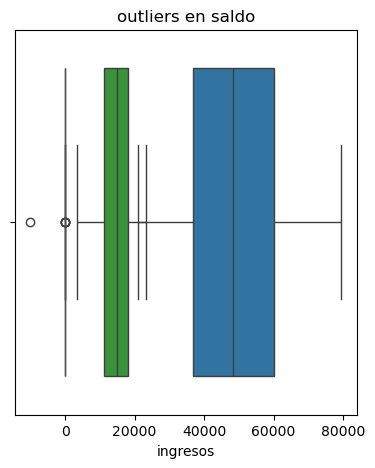

In [19]:
#visualización de los datos en gráficos

plt.figure(figsize = (15,5))

#grafico de ingresos

plt.subplot(1,3,1)
sns.boxplot(x=df['ingresos'])
plt.title('outliers en ingresos')

#grafico edad

plt.subplot(1,3,1)
sns.boxplot(x=df['edad'])
plt.title('outliers en edad')


#grafico saldo

plt.subplot(1,3,1)
sns.boxplot(x=df['saldo'])
plt.title('outliers en saldo')

In [20]:
# se reemplazara el valor negativo por cero


df['saldo'] = df['saldo'].apply(lambda x: 0 if x < 0 else x)

C:\Users\Dell\AppData\Local\Temp\ipykernel_9880\124167066.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['saldo'] = df['saldo'].apply(lambda x: 0 if x < 0 else x)


- Se detectó un saldo negativo extremo (-10,000).
- Se reemplazó por 0, dado que el análisis no contempla deudas o sobregiros explícitos.

In [21]:
# visualizar si aún existen valores en outliers

df['saldo'].describe()

count       99.000000
mean     14490.171641
std       4964.920713
min          0.000000
25%      11315.540000
50%      14844.070000
75%      18032.765000
max      23347.638500
Name: saldo, dtype: float64

In [22]:
# mostrar si aún existen valores menores en 0

df[df['saldo'] < 0]

,cliente_id,edad,ingresos,saldo,productos_contratados,tipo_cuenta,churn


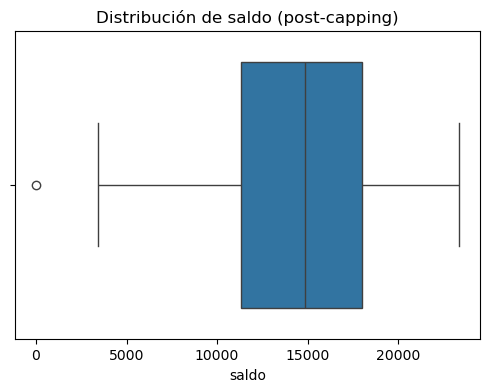

In [23]:
# visualización en grafica para ver si aún existen outliers

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['saldo'])
plt.title('Distribución de saldo (post-capping)')
plt.show()

In [24]:
df.groupby('churn')[['ingresos','saldo', 'edad']].mean().round(2)

,ingresos,saldo,edad
churn,,,
0,48317.35,14116.72,46.63
1,45573.33,15877.27,39.81


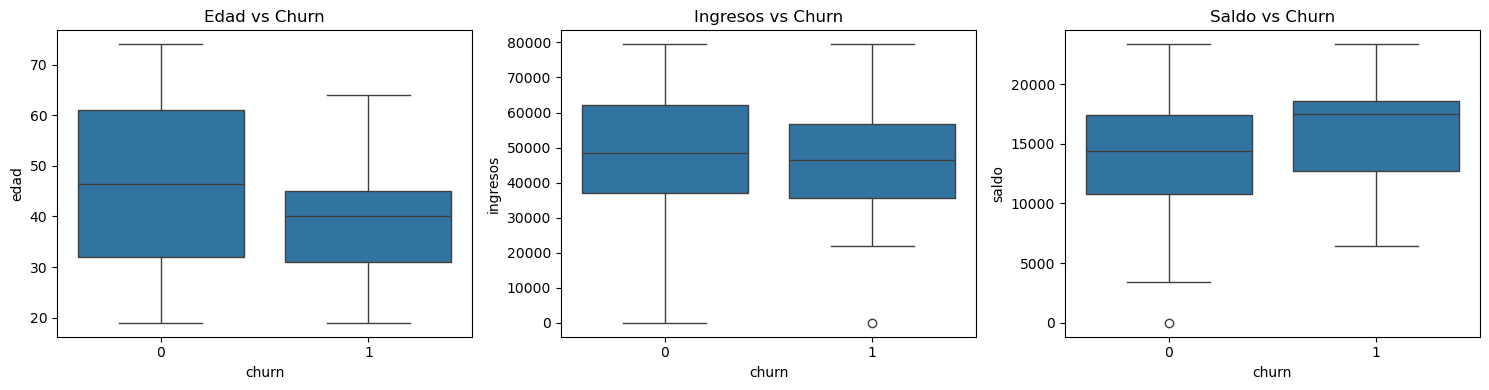

In [25]:
plt.figure(figsize=(15, 4))

# Edad vs churn
plt.subplot(1, 3, 1)
sns.boxplot(x='churn', y='edad', data=df)
plt.title('Edad vs Churn')

# Ingresos vs churn
plt.subplot(1, 3, 2)
sns.boxplot(x='churn', y='ingresos', data=df)
plt.title('Ingresos vs Churn')

# Saldo vs churn
plt.subplot(1, 3, 3)
sns.boxplot(x='churn', y='saldo', data=df)
plt.title('Saldo vs Churn')

plt.tight_layout()
plt.show()

# principales hallazgos:


### Insight exploratorio de churn (abandono)

- Los clientes que abandonan tienden a ser **más jóvenes**, con **menores ingresos**, pero un **saldo ligeramente mayor**.
- Esto sugiere que **la edad y el ingreso podrían ser buenos predictores de churn**.
- Se recomienda reforzar estrategias de retención para clientes jóvenes y de ingresos medios/bajos.

-observación por el tipo de cuenta y verificar si abandonan o no abandonan el mercado

In [26]:
pd.crosstab(df['tipo_cuenta'], df['churn'], normalize='index').round(2)

churn,0,1
tipo_cuenta,,
Ahorro,0.83,0.17
Corriente,0.83,0.17
Desconocido,1.00,0.00
Inversión,0.68,0.32


In [27]:
pd.crosstab(df['tipo_cuenta'], df['churn'])

churn,0,1
tipo_cuenta,,
Ahorro,34,7
Corriente,20,4
Desconocido,3,0
Inversión,21,10


In [28]:
pd.crosstab(df['productos_contratados'], df['churn'], normalize='index').round(2)

churn,0,1
productos_contratados,,
1,0.74,0.26
2,0.81,0.19
3,0.82,0.18
4,0.79,0.21


In [29]:
pd.crosstab(df['productos_contratados'], df['churn'])

churn,0,1
productos_contratados,,
1,20,7
2,22,5
3,14,3
4,22,6


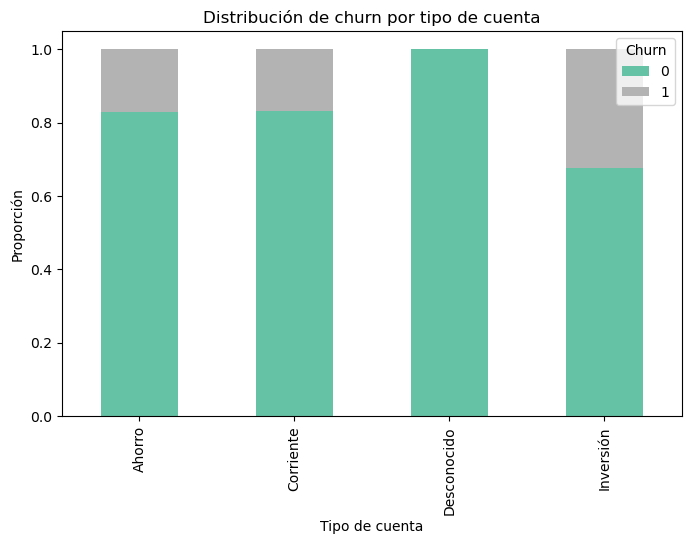

In [30]:
# Tipo de cuenta
pd.crosstab(df['tipo_cuenta'], df['churn'], normalize='index').plot(
    kind='bar', stacked=True, colormap='Set2', figsize=(8,5))
plt.title('Distribución de churn por tipo de cuenta')
plt.ylabel('Proporción')
plt.xlabel('Tipo de cuenta')
plt.legend(title='Churn', loc='upper right')
plt.show()

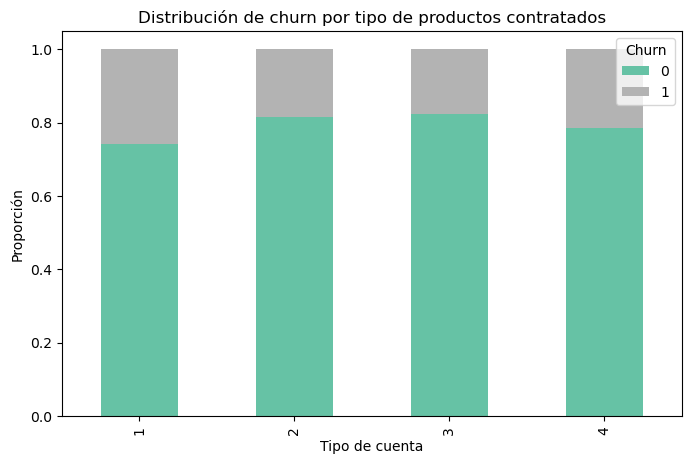

In [31]:
# Tipo de cuenta
pd.crosstab(df['productos_contratados'], df['churn'], normalize='index').plot(
    kind='bar', stacked=True, colormap='Set2', figsize=(8,5))
plt.title('Distribución de churn por tipo de productos contratados')
plt.ylabel('Proporción')
plt.xlabel('Tipo de cuenta')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [32]:
# tipo de cuenta

df['tipo_cuenta'].value_counts()

tipo_cuenta
Ahorro         41
Inversión      31
Corriente      24
Desconocido     3
Name: count, dtype: int64

### Insight sobre tipo de cuenta y churn

- Se observó que los clientes con **cuenta de inversión tienen la tasa de abandono más alta (32%)**.
- En cambio, las cuentas de **ahorro y corriente presentan un abandono bajo (17%)**.
- Este patrón sugiere que los clientes de inversión podrían requerir una estrategia de fidelización más sólida.

### Insight: churn según número de productos contratados

- Los clientes con **solo 1 producto tienen la mayor tasa de churn (26%)**.
- En cambio, aquellos con 2 o más productos muestran **mayor fidelidad**, con tasas de abandono menores (18%–21%).
- Esto sugiere que **incrementar la vinculación del cliente podría mejorar la retención**.

In [ ]:
#se vuelve a verificar tipo de columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cliente_id             99 non-null     object 
 1   edad                   99 non-null     int64  
 2   ingresos               99 non-null     float64
 3   saldo                  99 non-null     float64
 4   productos_contratados  99 non-null     int64  
 5   tipo_cuenta            99 non-null     object 
 6   churn                  99 non-null     int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 6.2+ KB


In [ ]:
#se vuelve a verificar nulos
df.isnull().sum()  

cliente_id               0
edad                     0
ingresos                 0
saldo                    0
productos_contratados    0
tipo_cuenta              0
churn                    0
dtype: int64

In [35]:
df = pd.get_dummies(df, columns=['tipo_cuenta'], drop_first=True)

🧠 PASO 3: Se Codifica  variables categóricas (One-Hot Encoding)

In [45]:
#separación de variables x features y= target
X = df.drop(columns=['cliente_id', 'churn'])
y = df['churn']

La columna `cliente_id` fue excluida del modelo por ser solo un identificador único.  
Sin embargo, se conserva en el DataFrame para análisis exploratorios y visualización posterior.

🧪 PASO 4: Dividir entre entrenamiento y prueba

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Preparación para modelado
- Se realizó One-Hot Encoding a variables categóricas.
- Se separaron las variables predictoras (`X`) y la variable objetivo (`y = churn`).
- El conjunto de datos fue dividido en entrenamiento (80%) y prueba (20%).

### Modelo Regresión Logística

In [47]:
from sklearn.linear_model import LogisticRegression

modelo_logit = LogisticRegression(max_iter = 1000, random_state = 42)

modelo_logit.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### PRUEBA DE MODELO

In [49]:
from sklearn.metrics import accuracy_score

y_pred = modelo_logit.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modelo:", round(accuracy, 2))

Accuracy del modelo: 0.8


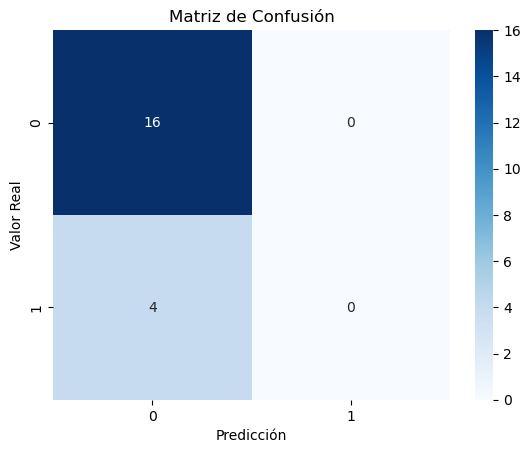

In [50]:
#Matriz de confusión

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20



c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Evaluación del modelo: Regresión Logística

Se evaluó el rendimiento con:
- Accuracy
- Matriz de confusión
- Reporte de clasificación

El modelo servirá como línea base para comparar con algoritmos más complejos.

### Conclusiones del modelo de regresión logística

- El modelo logró una precisión general (**accuracy**) del 80%.
- Sin embargo, **no detectó ningún caso de abandono real (churn)**.
- Esto se debe probablemente a un **desequilibrio en la clase objetivo**, donde los casos de churn (1) son pocos en comparación con los que se quedan (0).
- En la matriz de confusión:
  - 16 fueron correctamente clasificados como "no churn" (Verdaderos Negativos)
  - 4 fueron mal clasificados como "no churn" cuando sí lo eran (Falsos Negativos)

**Próximo paso sugerido:** Probar modelos como árboles de decisión o random forest y aplicar técnicas para manejar el desequilibrio (ej. `class_weight='balanced'`, SMOTE, etc.).

In [52]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(
    n_estimators=100,              # número de árboles
    random_state=42,
    class_weight='balanced'        
)

In [53]:
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [55]:
y_pred_rf = modelo_rf.predict(X_test)

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20



c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


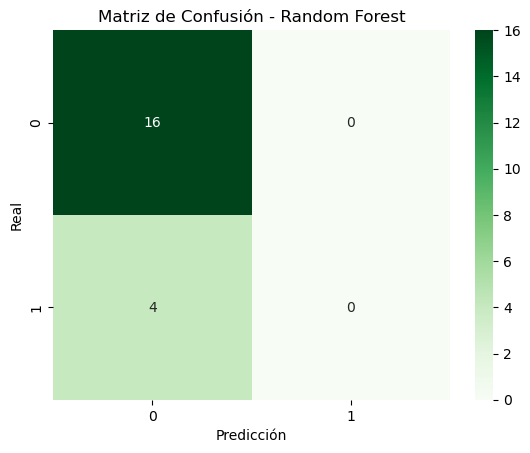

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Accuracy
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 2))

# Reporte completo
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

### Modelo: Random Forest con balanceo de clases

- Se entrenó un modelo de Random Forest con `class_weight='balanced'` para mitigar el problema del desequilibrio de clases.
- El rendimiento se evaluó con accuracy, matriz de confusión, y reporte de clasificación.
- También se analizó la importancia de variables predictoras.

Se realizará un SMOTE, ya que aún el modelo de random forest no logra predecir con efectividad ya que aún hay un desbalance de clases

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [61]:
print("Distribución original:\n", pd.Series(y_train).value_counts())
print("Después de SMOTE:\n", pd.Series(y_train_res).value_counts())

Distribución original:
 churn
0    62
1    17
Name: count, dtype: int64
Después de SMOTE:
 churn
0    62
1    62
Name: count, dtype: int64


como vemos ya quedaron balanceados los datos y se tendrá que reentrenar el modelo de nuevo

In [62]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf_smote = RandomForestClassifier(
    n_estimators=100, 
    random_state=42
)
modelo_rf_smote.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)